In [ ]:
# !git clone https://github.com/Changyoon-Lee/big_contest.git

Cloning into 'big_contest'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 360 (delta 0), reused 3 (delta 0), pack-reused 356
Receiving objects: 100% (360/360), 130.76 MiB | 24.60 MiB/s, done.
Resolving deltas: 100% (167/167), done.
Checking out files: 100% (230/230), done.


In [29]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy import stats

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from tqdm.notebook import tqdm
from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
tf.__version__

from datetime import datetime, timedelta

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
with open('/content/drive/My Drive/빅콘/merged_dataframe.pickle', 'rb') as f:
    data = pickle.load(f)

In [67]:
# numeric_columns = ['평균하차수']
# # cgr_columns = ['요일_label']
# numeric_pipeline = Pipeline([
#                              ('scaler', StandardScaler()
#                              )])
# df_pipeline = ColumnTransformer([
#                                  ('num_pipeline', numeric_pipeline, numeric_columns)
# ])

## Regression : 기준점 (승차 X, 평균하차수만)

In [68]:
score_train, score_test = [],[]

In [77]:
for i in tqdm(range(175)):
  prac = data[data['역명_label']==i]  
  prac = prac[['평균하차수','하차']]
  y = prac['하차']
  X = prac.drop('하차',axis=1)

  X_train, X_test, y_train, y_test = train_test_split(X, y,shuffle=False)
  # X_train_ready = df_pipeline.fit_transform(X_train)
  lin_reg = LinearRegression()
  lin_reg.fit(X_train, y_train)
  score_train.append(lin_reg.score(X_train, y_train))
  # X_test_ready = df_pipeline.fit_transform(X_test)
  score_test.append(lin_reg.score(X_test, y_test))

In [78]:
np.mean(score_train),np.mean(score_test)

(0.8996396161542967, 0.8599245448594858)

In [79]:
y_hat = lin_reg.predict(X_test)

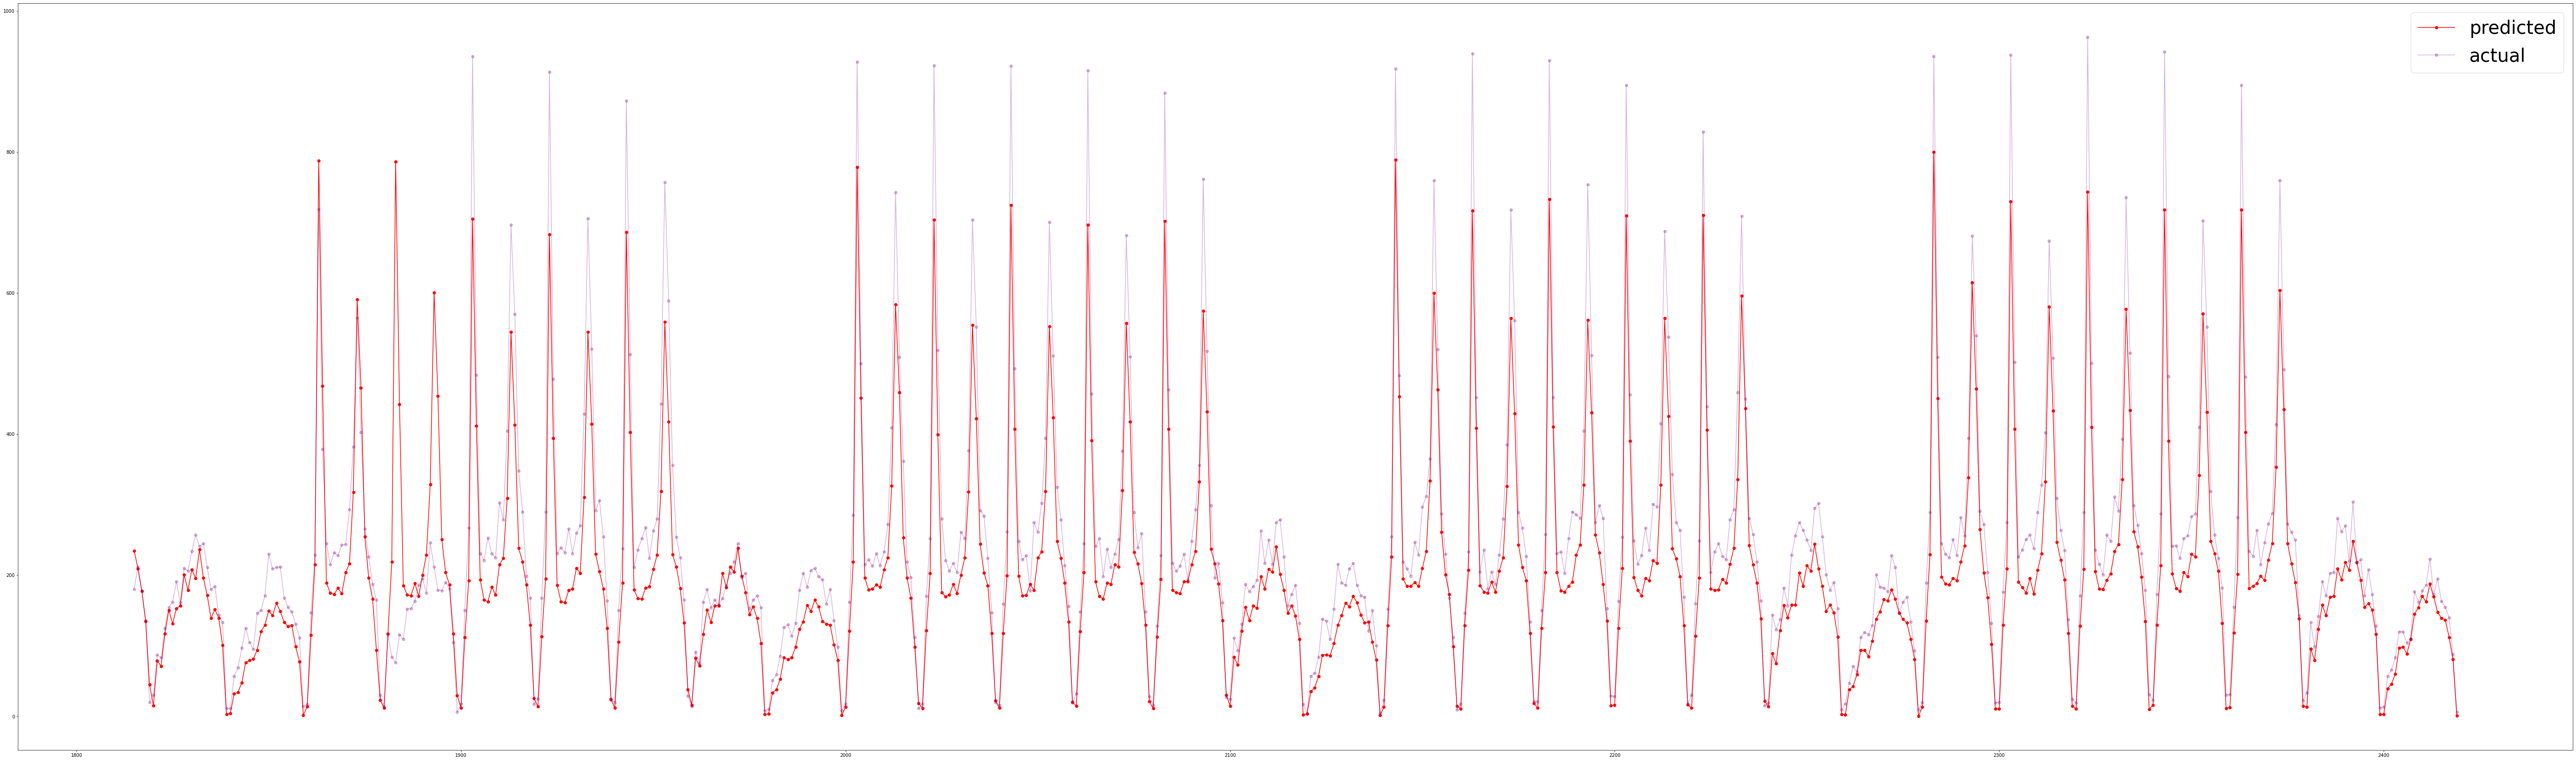

In [80]:
# y_axis = np.arange(0, len(y_train))
y_2_axis = np.arange(len(y_train), len(y_train) + len(y_hat))

plt.figure(figsize=(100,30))
# plt.plot(y_axis, y_train, '-o') #Train데이터 그래프로 표현
plt.plot(y_2_axis, y_hat, '-o', color='red', label='predicted') #x_test 예측값 그래프로 표현
plt.plot(y_2_axis, y_test, '-o', color='purple', alpha=0.3, label='actual') #y_test 실제값 그래프로 표현 
plt.legend(fontsize=40)
plt.show()

In [76]:
y_hat[:5], y_test[:5]

(array([45651.55378283, 40863.45200327, 34905.90601027, 26918.38138262,
        10148.99266158]), 417375    180
 417376    212
 417377    178
 417378    136
 417379     20
 Name: 하차, dtype: int64)

In [ ]:
##승차 없애고

In [6]:
numeric_columns = ['공휴일', '주말제외공휴일', 'corona_stage', '행정구역_확진자', '전국_확진자','검색트랜드', '평균하차수']
cgr_columns = ['요일_label','시간_label']
numeric_pipeline = Pipeline([
                             ('scaler', StandardScaler()
                             )])
cgr_pipeline = Pipeline([
                         ('onehot', OneHotEncoder())
                         ])
df_pipeline = ColumnTransformer([
                                 ('num_pipeline', numeric_pipeline, numeric_columns),
                                 ('cgr_pipeline', cgr_pipeline, cgr_columns)
])

In [7]:
score_train, score_test = [],[]

In [8]:
for i in tqdm(range(175)):
  prac = data[data['역명_label']==i]  
  prac = prac[['공휴일', '주말제외공휴일', 'corona_stage', '행정구역_확진자', '전국_확진자',
        '검색트랜드', '평균하차수','요일_label','하차','시간_label']]
  y = prac['하차']
  X = prac.drop('하차',axis=1)

  X_train, X_test, y_train, y_test = train_test_split(X, y,shuffle=False)
  X_train_ready = df_pipeline.fit_transform(X_train)
  lin_reg = LinearRegression()
  lin_reg.fit(X_train_ready, y_train)
  score_train.append(lin_reg.score(X_train_ready, y_train))
  X_test_ready = df_pipeline.fit_transform(X_test)
  score_test.append(lin_reg.score(X_test_ready, y_test))

KeyboardInterrupt: ignored

In [ ]:
np.mean(score_train),np.mean(score_test)

In [ ]:
y_hat = lin_reg.predict(X_test_ready)

In [ ]:
# y_axis = np.arange(0, len(y_train))
y_2_axis = np.arange(len(y_train), len(y_train) + len(y_hat))

plt.figure(figsize=(100,30))
# plt.plot(y_axis, y_train, '-o') #Train데이터 그래프로 표현
plt.plot(y_2_axis, y_hat, '-o', color='red', label='predicted') #x_test 예측값 그래프로 표현
plt.plot(y_2_axis, y_test, '-o', color='purple', alpha=0.3, label='actual') #y_test 실제값 그래프로 표현 
plt.legend(fontsize=40)
plt.show()

# Regression Model
- 시간라벨 X : train: 0.928, test: 0.872
- 시간라벨 O : train: 0.939, test: 0.884

In [45]:
numeric_columns = ['승차', '공휴일', '주말제외공휴일', 'corona_stage', '행정구역_확진자', '전국_확진자','검색트랜드', '평균하차수']
cgr_columns = ['요일_label']
numeric_pipeline = Pipeline([
                             ('scaler', StandardScaler()
                             )])
cgr_pipeline = Pipeline([
                         ('onehot', OneHotEncoder())
                         ])
df_pipeline = ColumnTransformer([
                                 ('num_pipeline', numeric_pipeline, numeric_columns),
                                 ('cgr_pipeline', cgr_pipeline, cgr_columns)
])

In [46]:
score_train, score_test = [],[]

In [48]:
for i in tqdm(range(175)):
  prac = data[data['역명_label']==i]  
  prac = prac[['승차','공휴일', '주말제외공휴일', 'corona_stage', '행정구역_확진자', '전국_확진자',
        '검색트랜드', '평균하차수','요일_label','하차']]
  y = prac['하차']
  X = prac.drop('하차',axis=1)

  X_train, X_test, y_train, y_test = train_test_split(X, y,shuffle=False)
  X_train_ready = df_pipeline.fit_transform(X_train)
  lin_reg = LinearRegression()
  lin_reg.fit(X_train_ready, y_train)
  score_train.append(lin_reg.score(X_train_ready, y_train))
  X_test_ready = df_pipeline.fit_transform(X_test)
  score_test.append(lin_reg.score(X_test_ready, y_test))

In [23]:
prac.columns

Index(['승차', '공휴일', '주말제외공휴일', 'corona_stage', '행정구역_확진자', '전국_확진자', '검색트랜드',
       '평균하차수', '요일_label', '하차'],
      dtype='object')

In [22]:
lin_reg.coef_

array([ 5.21986364e+01, -3.56740913e+01, -8.52651283e-14,  3.63190655e+00,
       -8.33254957e-01, -1.28088140e+01, -2.82346414e+00,  1.31333233e+02,
       -2.39616019e+01, -2.53975809e+01, -1.93532510e+01, -1.44101055e+01,
        5.29069435e+01,  5.32783603e+01, -2.30627646e+01])

In [ ]:
# y에 대한 분포
# sns.distplot(prac['하차'], rug=True, rug_kws={'alpha': 0.05})
# stats.probplot(prac['하차'], plot=plt)

In [ ]:
np.mean(score_train),np.mean(score_test)

(0.9279874903620878, 0.8724320758653994)

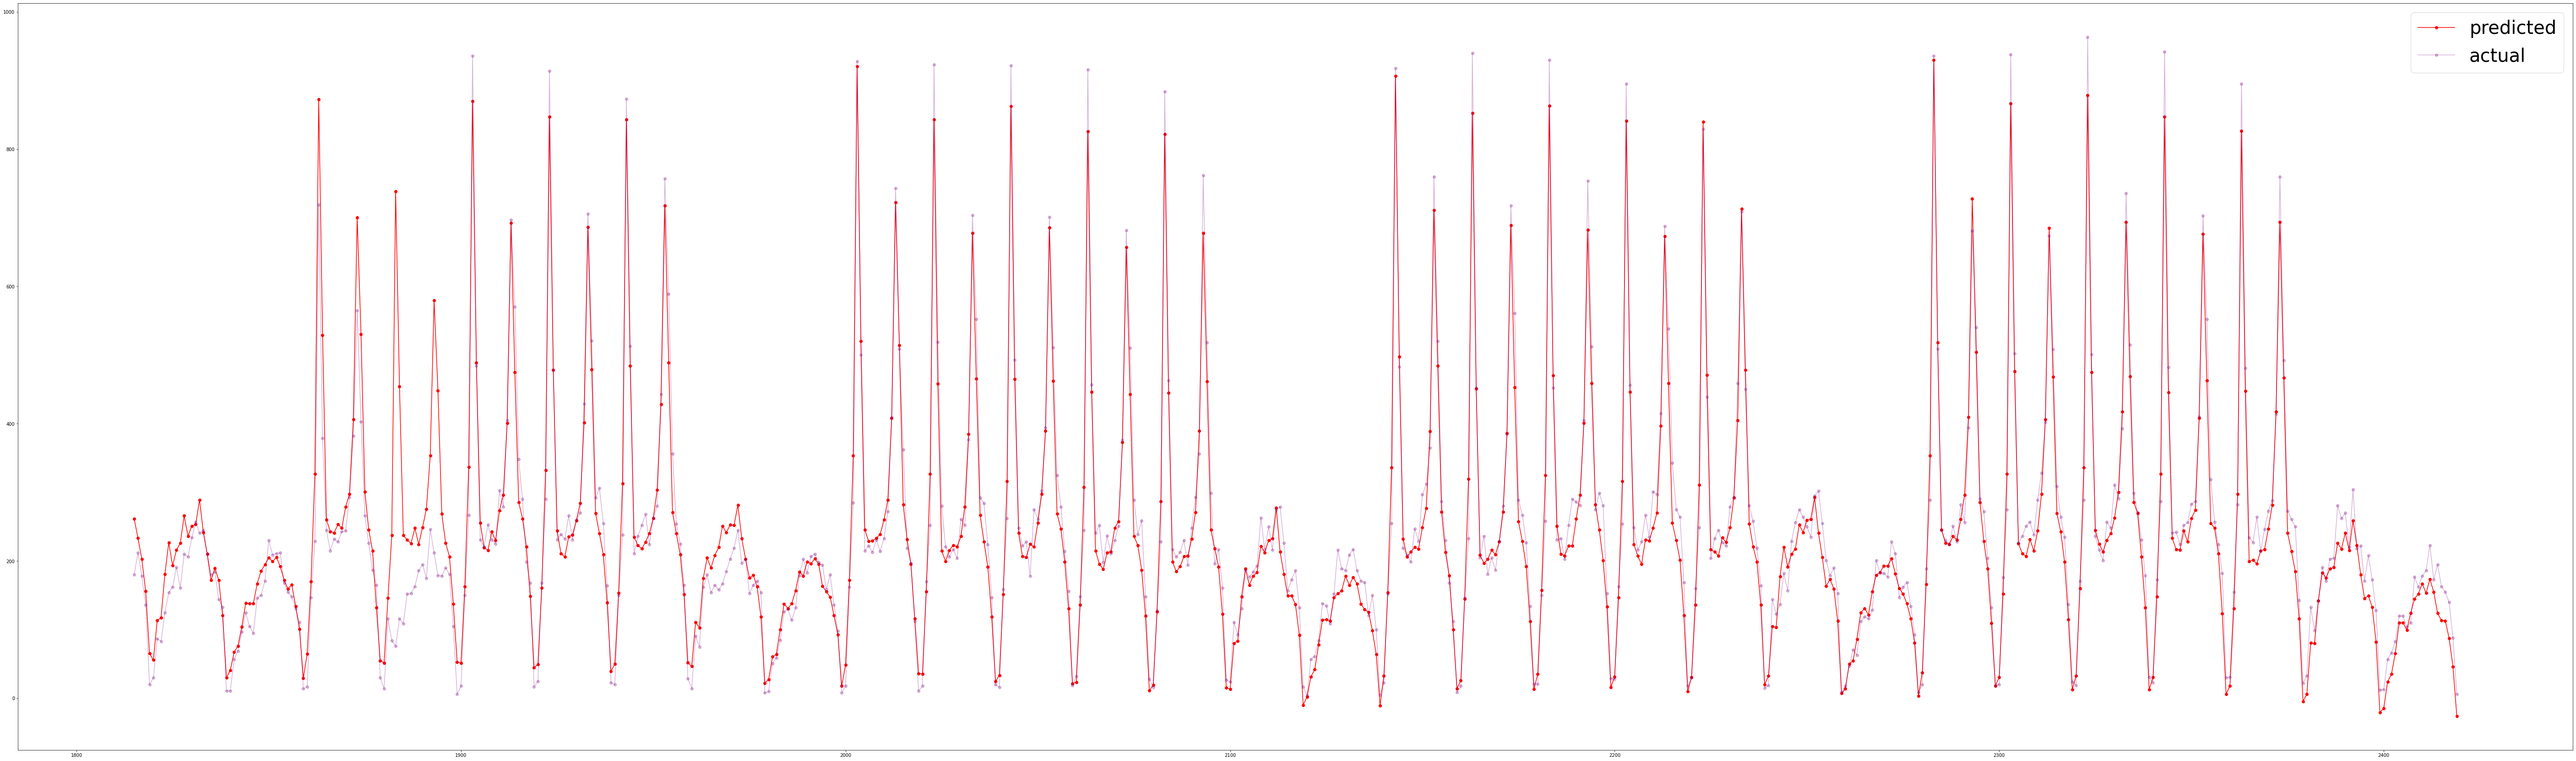

In [ ]:
# y_axis = np.arange(0, len(y_train))
y_2_axis = np.arange(len(y_train), len(y_train) + len(y_hat))

plt.figure(figsize=(100,30))
# plt.plot(y_axis, y_train, '-o') #Train데이터 그래프로 표현
plt.plot(y_2_axis, y_hat, '-o', color='red', label='predicted') #x_test 예측값 그래프로 표현
plt.plot(y_2_axis, y_test, '-o', color='purple', alpha=0.3, label='actual') #y_test 실제값 그래프로 표현 
plt.legend(fontsize=40)
plt.show()

###시간데이터 label 추가

In [25]:
numeric_columns = ['승차', '공휴일', '주말제외공휴일', 'corona_stage', '행정구역_확진자', '전국_확진자','검색트랜드', '평균하차수']
cgr_columns = ['요일_label','시간_label']
numeric_pipeline = Pipeline([
                             ('scaler', StandardScaler()
                             )])
cgr_pipeline = Pipeline([
                         ('onehot', OneHotEncoder())
                         ])
df_pipeline = ColumnTransformer([
                                 ('num_pipeline', numeric_pipeline, numeric_columns),
                                 ('cgr_pipeline', cgr_pipeline, cgr_columns)
])

In [ ]:
score_train, score_test = [],[]
for i in tqdm(range(175)):
  prac = data[data['역명_label']==i]  
  prac = prac[['승차','시간_label','공휴일', '주말제외공휴일', 'corona_stage', '행정구역_확진자', '전국_확진자',
        '검색트랜드', '평균하차수','요일_label','하차']]
  y = prac['하차']
  X = prac.drop('하차',axis=1)

  X_train, X_test, y_train, y_test = train_test_split(X, y,shuffle=False)
  X_train_ready = df_pipeline.fit_transform(X_train)
  lin_reg = LinearRegression()
  lin_reg.fit(X_train_ready, y_train)
  score_train.append(lin_reg.score(X_train_ready, y_train))
  X_test_ready = df_pipeline.fit_transform(X_test)
  score_test.append(lin_reg.score(X_test_ready, y_test))

In [ ]:
np.mean(score_train),np.mean(score_test)

(0.9390231113193638, 0.8842793250400512)

# Random Forest Regressor
(0.9702619202201322, 0.9025051341560678)
- 시간라벨 X : train: 0.970, test: 0.902
- 시간라벨 O : train: 0.972, test: 0.904

In [ ]:
numeric_columns = ['승차', '공휴일', '주말제외공휴일', 'corona_stage', '행정구역_확진자', '전국_확진자','검색트랜드', '평균하차수']
cgr_columns = ['요일_label','시간_label']
numeric_pipeline = Pipeline([
                             ('scaler', StandardScaler()
                             )])
cgr_pipeline = Pipeline([
                         ('onehot', OneHotEncoder())
                         ])
df_pipeline = ColumnTransformer([
                                 ('num_pipeline', numeric_pipeline, numeric_columns),
                                 ('cgr_pipeline', cgr_pipeline, cgr_columns)
])

In [ ]:
score_train, score_test = [],[]
for i in tqdm(range(175)):
  prac = data[data['역명_label']==i]  
  prac = prac[['승차','시간_label','공휴일', '주말제외공휴일', 'corona_stage', '행정구역_확진자', '전국_확진자',
        '검색트랜드', '평균하차수','요일_label','하차']]
  y = prac['하차']
  X = prac.drop('하차',axis=1)

  X_train, X_test, y_train, y_test = train_test_split(X, y,shuffle=False)
  X_train_ready = df_pipeline.fit_transform(X_train)
  forest = RandomForestRegressor(max_depth=5)
  forest.fit(X_train_ready, y_train)
  score_train.append(forest.score(X_train_ready, y_train))
  X_test_ready = df_pipeline.fit_transform(X_test)
  score_test.append(forest.score(X_test_ready, y_test))

In [ ]:
np.mean(score_train),np.mean(score_test) #8

(0.9719002318902322, 0.904607190885942)

In [ ]:
numeric_columns = ['승차', '공휴일', '주말제외공휴일', 'corona_stage', '행정구역_확진자', '전국_확진자','검색트랜드', '평균하차수']
cgr_columns = ['요일_label']
numeric_pipeline = Pipeline([
                             ('scaler', StandardScaler()
                             )])
cgr_pipeline = Pipeline([
                         ('onehot', OneHotEncoder())
                         ])
df_pipeline = ColumnTransformer([
                                 ('num_pipeline', numeric_pipeline, numeric_columns),
                                 ('cgr_pipeline', cgr_pipeline, cgr_columns)
])

In [ ]:
score_train, score_test = [],[]
for i in tqdm(range(175)):
  prac = data[data['역명_label']==i]  
  prac = prac[['승차','시간_label','공휴일', '주말제외공휴일', 'corona_stage', '행정구역_확진자', '전국_확진자',
        '검색트랜드', '평균하차수','요일_label','하차']]
  y = prac['하차']
  X = prac.drop('하차',axis=1)

  X_train, X_test, y_train, y_test = train_test_split(X, y,shuffle=False)
  X_train_ready = df_pipeline.fit_transform(X_train)
  forest = RandomForestRegressor(max_depth=5)
  forest.fit(X_train_ready, y_train)
  score_train.append(forest.score(X_train_ready, y_train))
  X_test_ready = df_pipeline.fit_transform(X_test)
  score_test.append(forest.score(X_test_ready, y_test))

In [ ]:
np.mean(score_train),np.mean(score_test) #5

(0.9702452569623503, 0.9020317266946408)

## Time series

In [12]:
prac = data[['역명_label', 'date', '시간', '시간_label','하차']]

In [13]:
prac['date']= [str(i.date()) for i in prac['date']]
date_list = set(prac['date'])
time_list = ['1-2','2-3','3-4','4-5']
label_list = [20,21,22,23]
for i in tqdm(range(173)):
  for j in date_list:
    for k,l in zip(time_list, label_list):
      prac.loc[len(prac)] = [i,j,k,l,0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [27]:
prac = prac.sort_values(by=['역명_label','date'],axis=0).reset_index(drop=True)
prac[:30]

,역명_label,date,시간,시간_label,하차
0,0,2020-02-01,5-6,15,92
1,0,2020-02-01,6-7,16,301
2,0,2020-02-01,7-8,17,328
3,0,2020-02-01,8-9,18,535
4,0,2020-02-01,9-10,19,635
5,0,2020-02-01,10-11,0,651
6,0,2020-02-01,11-12,1,704
7,0,2020-02-01,12-13,2,785
8,0,2020-02-01,13-14,3,811
9,0,2020-02-01,14-15,4,797


In [28]:
time_ls = ['{:02}:00:00'.format(i) for i in range(5,24)] + ['{:02}:00:00'.format(i) for i in range(1,5)]
# prac['time'] = time_ls*(len(prac)//len(time_ls))
# prac['new_date'] = prac['date'] +' ' + prac['time']
# prac['new_date'] = prac['new_date'].astype('datetime64[ns]')

ValueError: ignored

In [ ]:
for i in range(len(prac)):
  if prac['시간'].iloc[i] == '24-01':
    prac['new_date'].iloc[i] = prac['new_date'].iloc[i] + timedelta(days=1)

In [188]:
prac.sort_values(by=['date','시간'],axis=0)
prac = prac.reset_index(drop=True)

In [189]:
prac[-30:]

,index,역명_label,date,시간,시간_label,하차
501682,501682,172,2020-02-20,3-4,22,0
501683,501683,172,2020-02-20,4-5,23,0
501684,501684,172,2020-05-13,1-2,20,0
501685,501685,172,2020-05-13,2-3,21,0
501686,501686,172,2020-05-13,3-4,22,0
501687,501687,172,2020-05-13,4-5,23,0
501688,501688,172,2020-02-14,1-2,20,0
501689,501689,172,2020-02-14,2-3,21,0
501690,501690,172,2020-02-14,3-4,22,0
501691,501691,172,2020-02-14,4-5,23,0


In [180]:
import pickle

In [181]:
with open('data_timeseries.pickle', 'wb') as f:
    pickle.dump(prac, f, pickle.HIGHEST_PROTOCOL)

In [ ]:
prac = prac[['역명_label','new_date','하차']]

In [ ]:
import logging
logging.getLogger('fbprophet').setLevel(logging.WARNING)
from fbprophet import Prophet

prophet = Prophet()

In [ ]:
subway = prac[prac['역명_label']==0] 
subway = subway[['new_date','하차']]
subway.columns = ['ds','y']

In [ ]:
X_train = subway[:1800]
X_test = subway[1800:]

In [ ]:
prophet.fit(X_train)

In [ ]:
future = prophet.make_future_dataframe(periods=30,freq='H')
forecast = prophet.predict(future)
y_hat = forecast.iloc[1210:].yhat

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-02-01 00:00:00,711.275114,29.610420,928.368892,711.275114,711.275114,-247.986110,-247.986110,-247.986110,-285.836959,-285.836959,-285.836959,37.850848,37.850848,37.850848,0.0,0.0,0.0,463.289004
1,2020-02-01 05:00:00,710.251565,-436.739862,446.626693,710.251565,710.251565,-711.960484,-711.960484,-711.960484,-662.693220,-662.693220,-662.693220,-49.267264,-49.267264,-49.267264,0.0,0.0,0.0,-1.708919
2,2020-02-01 06:00:00,710.046855,148.264402,1067.980868,710.046855,710.046855,-96.630353,-96.630353,-96.630353,-27.524478,-27.524478,-27.524478,-69.105875,-69.105875,-69.105875,0.0,0.0,0.0,613.416502
3,2020-02-01 07:00:00,709.842145,695.747307,1599.097540,709.842145,709.842145,473.094874,473.094874,473.094874,562.609073,562.609073,562.609073,-89.514199,-89.514199,-89.514199,0.0,0.0,0.0,1182.937019
4,2020-02-01 08:00:00,709.637435,956.895690,1844.236473,709.637435,709.637435,695.607656,695.607656,695.607656,805.980158,805.980158,805.980158,-110.372502,-110.372502,-110.372502,0.0,0.0,0.0,1405.245091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1825,2020-05-02 01:00:00,553.769043,-266.498147,652.234560,553.730953,553.830318,-352.631429,-352.631429,-352.631429,-374.952290,-374.952290,-374.952290,22.320861,22.320861,22.320861,0.0,0.0,0.0,201.137614
1826,2020-05-02 02:00:00,553.843143,-516.372886,317.386072,553.792058,553.912582,-639.840939,-639.840939,-639.840939,-645.611020,-645.611020,-645.611020,5.770082,5.770082,5.770082,0.0,0.0,0.0,-85.997796
1827,2020-05-02 03:00:00,553.917243,-855.753505,28.211843,553.858327,554.000430,-960.732297,-960.732297,-960.732297,-948.999061,-948.999061,-948.999061,-11.733235,-11.733235,-11.733235,0.0,0.0,0.0,-406.815054
1828,2020-05-02 04:00:00,553.991343,-902.078682,-56.067102,553.922006,554.087830,-1039.166370,-1039.166370,-1039.166370,-1009.057073,-1009.057073,-1009.057073,-30.109297,-30.109297,-30.109297,0.0,0.0,0.0,-485.175027


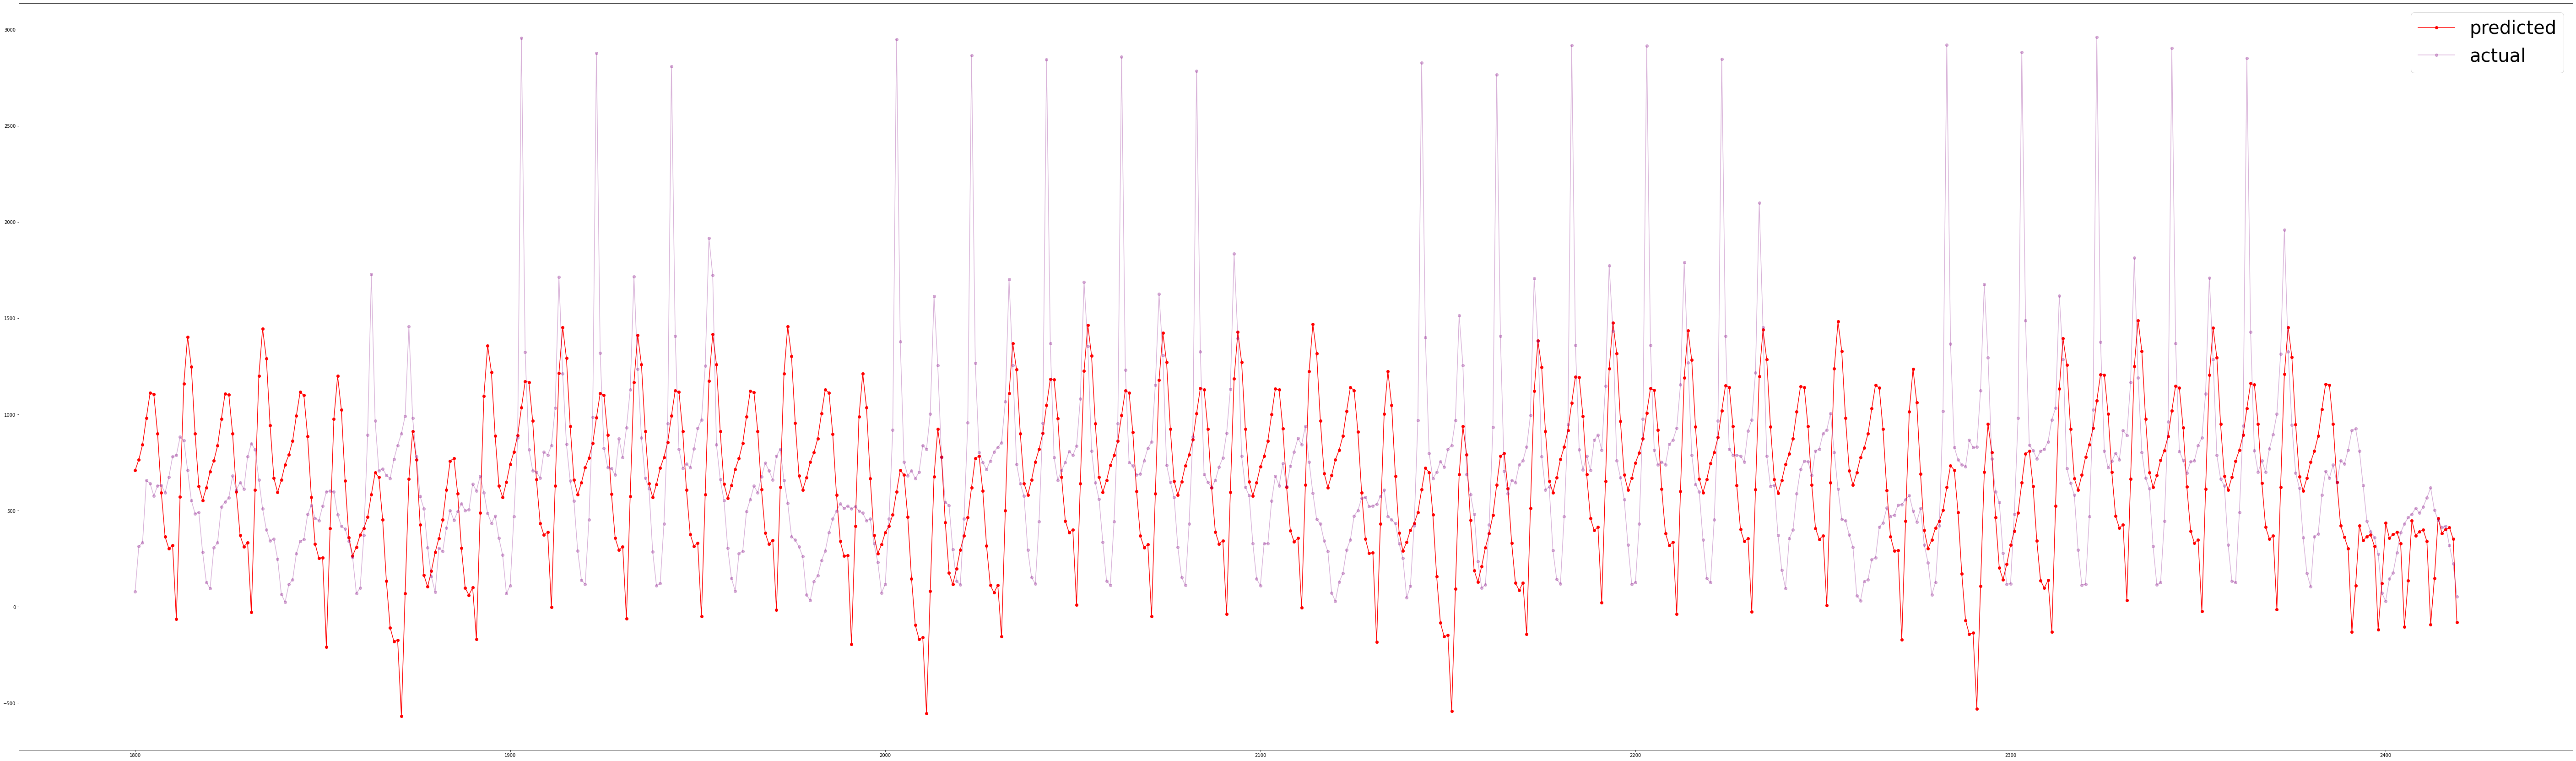

In [ ]:
# y_axis = np.arange(0, len(y_train))
y_2_axis = np.arange(len(X_train), len(X_train) + len(y_hat))

plt.figure(figsize=(100,30))
# plt.plot(y_axis, y_train, '-o') #Train데이터 그래프로 표현
plt.plot(y_2_axis, y_hat, '-o', color='red', label='predicted') #x_test 예측값 그래프로 표현
plt.plot(y_2_axis, X_test['y'], '-o', color='purple', alpha=0.3, label='actual') #y_test 실제값 그래프로 표현 
plt.legend(fontsize=40)
plt.show()

# LSTM

In [ ]:
prac = data[['역명_label', 'date', '시간', '시간_label','하차']]

In [ ]:
score_train, score_test = [],[]
for i in tqdm(range(175)):
  prac = data[data['역명_label']==i]  
  prac = prac[['승차','시간_label','공휴일', '주말제외공휴일', 'corona_stage', '행정구역_확진자', '전국_확진자',
        '검색트랜드', '평균하차수','요일_label','하차']]
  y = prac['하차']
  X = prac.drop('하차',axis=1)

  X_train, X_test, y_train, y_test = train_test_split(X, y,shuffle=False)
  X_train_ready = df_pipeline.fit_transform(X_train)
  forest = RandomForestRegressor(max_depth=5)
  forest.fit(X_train_ready, y_train)
  score_train.append(forest.score(X_train_ready, y_train))
  X_test_ready = df_pipeline.fit_transform(X_test)
  score_test.append(forest.score(X_test_ready, y_test))

In [7]:
prac = data[data['역명_label']==0]  
prac = prac[['승차','시간_label','공휴일', '주말제외공휴일', 'corona_stage', '행정구역_확진자', '전국_확진자',
        '검색트랜드', '평균하차수','요일_label','하차']]
y = prac['하차']
X = prac.drop('하차',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y,shuffle=False)
X_train_ready = df_pipeline.fit_transform(X_train)

In [12]:
X_train.shape

(1815, 10)

In [14]:
model = models.Sequential()  
model.add(layers.LSTM(32, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))  
model.add(layers.Dropout(0.2)) # overfitting을 막기 위해 20% 가량을 drop  
model.add(layers.LSTM(32, batch_input_shape=(batch_size, look_back, 1), stateful=True))  
model.add(layers.Dropout(0.2))  
model.add(layers.Dense(1))

# 학습 과정 설정
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 학습
for i in range(10):  
    hist = model.fit(X_train, y_train, epochs=100, batch_size=batch_size)
    with open(home_path + 'model/seq/trade_count_save_state_lstm.history_'+str(i), 'wb') as f :   
        pickle.dump(hist, f)
    model.save(home_path + 'model/seq/trade_count_save_state_lstm.hdf5_'+str(i))
model.save(home_path + 'model/trade_count_save_state_lstm.hdf5')  

Epoch 1/100


ValueError: ignored